<a href="https://colab.research.google.com/github/kiamaikocoders/Aviation-Business-Project/blob/main/Aviation_Business_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PHASE 1 PROJECT AVIATION ACCIDENT ANALYSIS**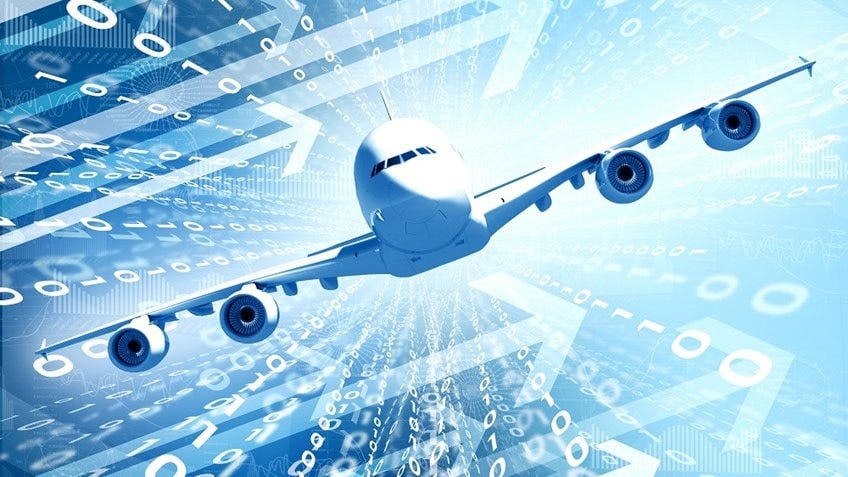

 **DEFINING THE QUESTION**

 *Introduction In this project, we will analyze aviation accident data to generate insights and recommendations for a business stakeholder interested in purchasing and operating airplanes for commercial and private enterprises. The dataset used is from the National Transportation Safety Board and includes aviation accident data from 1962 to 2023 about civil aviation accidents and selected incidents in the United States and international waters.*



# **Business Problem**
The client is expanding in to new industries to diversify its portfolio.  
Specifically, they are interested in purchasing and operating airplanes for commercial and private enterprises, but do not know anything about the potential risks of aircraft.  
Our  task is to determine which aircraft are the lowest risk for the company to start this new business endeavor.  
Client needs three concrete recommendations with findings into actionable insights that the head of the new aviation division can use to help decide which aircraft to purchase.

**Table of contents**  
1. [About](#about)
2. [Business problem & Data understanding](#business-problem)
3. [Data preprocessing](#data-preprocessing)
- 3.1. [Exploring data](#exploring-data)
- 3.2. [Data preparation](#data-preparation)
4. [Exploratory data analysis](#exploratory-data-analysis)
- 4.1. [General data analysis](#general-data-analysis)
- 4.2. [Data analysis for recommendations](#data-analysis-for-recommendations)
5. [Summary](#summary)

## Data Preprocessing

### Exploring Data

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")


In [ ]:
df = pd.read_csv('data/AviationData.csv', encoding='latin-1')
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50248 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [ ]:
df.isna().sum().sort_values(ascending=False)

Schedule                  76307
Air.carrier               72241
FAR.Description           56866
Aircraft.Category         56602
Longitude                 54516
Latitude                  54507
Airport.Code              38641
Airport.Name              36099
Broad.phase.of.flight     27165
Publication.Date          13771
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Fatal.Injuries      11401
Engine.Type                7077
Report.Status              6381
Purpose.of.flight          6192
Number.of.Engines          6084
Total.Uninjured            5912
Weather.Condition          4492
Aircraft.damage            3194
Registration.Number        1317
Injury.Severity            1000
Country                     226
Amateur.Built               102
Model                        92
Make                         63
Location                     52
Event.Date                    0
Accident.Number               0
Investigation.Type            0
Event.Id                      0
dtype: i

In [ ]:
round((df.isna().sum().sort_values(ascending = False) / df.shape[0] * 100), 2).to_frame("%")

,%
Schedule,85.85
Air.carrier,81.27
FAR.Description,63.97
Aircraft.Category,63.68
Longitude,61.33
Latitude,61.32
Airport.Code,43.47
Airport.Name,40.61
Broad.phase.of.flight,30.56
Publication.Date,15.49


In [ ]:
df.duplicated().sum()

0

1. We have a dataset of 88889 rows and 31 columns
2. 5 columns have float64 data type, 26 columns - object data type
3. No duplicates found
4. Non-informative columns (based on our task) to be deleted.  
Such as: Schedule, Air.carrier, FAR.Description, Airport.Code, Airport.Name, Publication.Date, Purpose.of.flight, Registration.Number, Longitude, Latitude, Location, Country, Report.Status, Accident.Number, Event.ID
4. Injury.Severity duplicates Total.Fatal.Injuries, Total.Minor.Injuries, Total.Serious.Injuries  
and Total.Uninjured. Injury.Severity to be deleted
4. Data in dataframe to be converted to lowercase type if needed
5. Name of columns to be converted to snake style
6. Column Event.Date to be converted to datetime type
8. Columns: Number.of.Engines,Total.Fatal.Injuries, Iotal.Minor.Injuries, Total.Serious.Injuries, Total.Uninjured  to be converted to integer data type
11. Almost all the columns, except Event.Date, Accident.Number, Investigation.Type ,Event.Id, have missing values. Analyse them and find solution for missing values
12. Add new columns if needed

### Data Preparation

Dropping non-informative columns

In [ ]:
df = df.drop(['Accident.Number', 'Schedule', 'Air.carrier',
              'FAR.Description', 'Airport.Code', 'Airport.Name',
              'Publication.Date', 'Purpose.of.flight',
              'Registration.Number', 'Event.Id', 'Accident.Number',
              'Longitude', 'Latitude', 'Report.Status',
              'Location', 'Country', 'Injury.Severity'], axis=1)

Correcting names of the columns

In [ ]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace('.', '_')

Converting column 'event_date' to datetime data type

In [ ]:
df['event_date'] = pd.to_datetime(df['event_date'], format='%Y-%m-%d')

Extracting year, month, and day components from 'event_date'  
Adding new columns

In [ ]:

df['event_year'] = df['event_date'].dt.year
df['event_month'] = df['event_date'].dt.month
df['event_day'] = df['event_date'].dt.dayofweek

In [ ]:
df.head()

,investigation_type,event_date,aircraft_damage,aircraft_category,make,model,amateur_built,number_of_engines,engine_type,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,event_year,event_month,event_day
0,Accident,1948-10-24,Destroyed,NaN,Stinson,108-3,No,1.0,Reciprocating,2.0,0.0,0.0,0.0,UNK,Cruise,1948,10,6
1,Accident,1962-07-19,Destroyed,NaN,Piper,PA24-180,No,1.0,Reciprocating,4.0,0.0,0.0,0.0,UNK,Unknown,1962,7,3
2,Accident,1974-08-30,Destroyed,NaN,Cessna,172M,No,1.0,Reciprocating,3.0,NaN,NaN,NaN,IMC,Cruise,1974,8,4
3,Accident,1977-06-19,Destroyed,NaN,Rockwell,112,No,1.0,Reciprocating,2.0,0.0,0.0,0.0,IMC,Cruise,1977,6,6
4,Accident,1979-08-02,Destroyed,NaN,Cessna,501,No,NaN,NaN,1.0,2.0,NaN,0.0,VMC,Approach,1979,8,3


Checking unique values of the dataframe columns

In [ ]:
for index in df:
    print(index,":", df[index].unique())

investigation_type : ['Accident' 'Incident']
event_date : ['1948-10-24T00:00:00.000000000' '1962-07-19T00:00:00.000000000'
 '1974-08-30T00:00:00.000000000' ... '2022-12-22T00:00:00.000000000'
 '2022-12-26T00:00:00.000000000' '2022-12-29T00:00:00.000000000']
aircraft_damage : ['Destroyed' 'Substantial' 'Minor' nan 'Unknown']
aircraft_category : [nan 'Airplane' 'Helicopter' 'Glider' 'Balloon' 'Gyrocraft' 'Ultralight'
 'Unknown' 'Blimp' 'Powered-Lift' 'Weight-Shift' 'Powered Parachute'
 'Rocket' 'WSFT' 'UNK' 'ULTR']
make : ['Stinson' 'Piper' 'Cessna' ... 'JAMES R DERNOVSEK' 'ORLICAN S R O'
 'ROYSE RALPH L']
model : ['108-3' 'PA24-180' '172M' ... 'ROTORWAY EXEC 162-F' 'KITFOX S5'
 'M-8 EAGLE']
amateur_built : ['No' 'Yes' nan]
number_of_engines : [ 1. nan  2.  0.  3.  4.  8.  6.]
engine_type : ['Reciprocating' nan 'Turbo Fan' 'Turbo Shaft' 'Unknown' 'Turbo Prop'
 'Turbo Jet' 'None' 'Electric' 'Hybrid Rocket' 'Geared Turbofan' 'LR'
 'NONE' 'UNK']
total_fatal_injuries : [  2.   4.   3.   1.  

Dropping missing values in 'amateur_built'

In [ ]:
df['amateur_built'] = df['amateur_built'].dropna()

Converting strings in 'weather_condition' into lowercase

In [ ]:
df['weather_condition'] = df['weather_condition'].str.lower()

In [ ]:
df['weather_condition'].unique()

array(['unk', 'imc', 'vmc', nan], dtype=object)

Filling up missing values with "unk"(Unknown) value

In [ ]:
df['weather_condition'] = df['weather_condition'].fillna('unk')

In [ ]:
df['weather_condition'] = df['weather_condition'].replace('unk', 'unknown')

Filling missing values of 'broad_phase_of_flight' with 'Unknown' value

In [ ]:
df['broad_phase_of_flight'] = df['broad_phase_of_flight'].fillna('Unknown')

Exploring missing values of 'make'

In [ ]:
df['make'].value_counts().head(10)

Cessna     22227
Piper      12029
CESSNA      4922
Beech       4330
PIPER       2841
Bell        2134
Boeing      1594
BOEING      1151
Grumman     1094
Mooney      1092
Name: make, dtype: int64

Converting to lower type to avoid duplicates

In [ ]:
df['make'] = df['make'].str.lower()

Dropping missing values

In [ ]:
df.dropna(subset=['make'], inplace=True)

Exploring missing values of 'model'

In [ ]:
df['model'].value_counts()

152                  2367
172                  1756
172N                 1164
PA-28-140             932
150                   829
                     ... 
M2OE                    1
L 39C                   1
FH-100                  1
DENNEY KITFOX MK2       1
JSX-2                   1
Name: model, Length: 12310, dtype: int64

Converting to lower type to avoid duplicates

In [ ]:
df['model'] = df['model'].str.lower()

Dropping missing values

In [ ]:
df.dropna(subset=['model'], inplace=True)

Exploring missing values of 'aircraft_damage'

In [ ]:
df['aircraft_damage'].value_counts()

Substantial    64097
Destroyed      18597
Minor           2792
Unknown          119
Name: aircraft_damage, dtype: int64

Filling  missing values with 'Unknown' value

In [ ]:
df['aircraft_damage'] = df['aircraft_damage'].fillna('Unknown')

Dropping all missing values in 'total_fatal_injuries', 'total_serious_injuries', 'total_minor_injuries', 'total_uninjured'

In [ ]:
df = df.dropna(subset=['total_fatal_injuries', 'total_serious_injuries',
                       'total_minor_injuries', 'total_uninjured'])

Converting the columns above into integer data type

In [ ]:
df['total_fatal_injuries'] = df['total_fatal_injuries'].astype('int64')
df['total_serious_injuries'] = df['total_serious_injuries'].astype('int64')
df['total_minor_injuries'] = df['total_minor_injuries'].astype('int64')
df['total_uninjured'] = df['total_uninjured'].astype('int64')

Defining a function that is going to fill up missing values of 'aircraft_category' based on mode value in 'model'

In [ ]:
def aircraft(row):
    if type(row['aircraft_category']) == str:
        return row['aircraft_category']

    else:
        mode_aircraft = df.loc[df['model'] == row['model'], 'aircraft_category'].mode()
        return mode_aircraft.iloc[0] if not mode_aircraft.empty else 'Unknown'


Applying the function to each row

In [ ]:
df['aircraft_category'] = df.apply(aircraft, axis=1)

Defining a function that is going to fill up missing values of 'number_of_engines' based on mean value in 'model'

In [ ]:
def numbers(row):
    if row['number_of_engines'] >= 0:
        return row['number_of_engines']
    else:
        mean_engines = df.loc[df['model'] == row['model'], 'number_of_engines'].mean()

        if not np.isnan(mean_engines):
            return round(mean_engines)
        else:
            return 'Unknown'

Applying the function to each row

In [ ]:
df['number_of_engines'] = df.apply(numbers, axis=1)

Deleting "Unknown' values and converting data into integer data type

In [ ]:
df = df[df['number_of_engines'] != 'Unknown']
df['number_of_engines'] = df['number_of_engines'].astype('int64')

In [ ]:
df['number_of_engines'].value_counts()

1    60478
2    10589
0     1463
3      461
4      429
8        3
6        1
Name: number_of_engines, dtype: int64

Defining a function that is going to fill up missing values of 'engine_type' based on mode value in 'model'.  


In [ ]:
def engines(row):
    if type(row['engine_type']) == str:
        return row['engine_type']

    else:
        mode_engine = df.loc[df['model'] == row['model'], 'engine_type'].mode()
        return mode_engine.iloc[0] if not mode_engine.empty else 'Unknown'


Applying the function to each row

In [ ]:
df['engine_type'] = df.apply(engines, axis=1)

Replacing implicit duplicates

In [ ]:
df['engine_type'].unique()

array(['Reciprocating', 'Turbo Shaft', 'Unknown', 'Turbo Fan',
       'Turbo Prop', 'Turbo Jet', 'NONE', 'None', 'Electric',
       'Hybrid Rocket', 'Geared Turbofan', 'LR', 'UNK'], dtype=object)

In [ ]:
df['engine_type'] = df['engine_type'].replace("UNK", "Unknown")
df['engine_type'] = df['engine_type'].replace("NONE", "None")


In [ ]:
df['engine_type'].unique()

array(['Reciprocating', 'Turbo Shaft', 'Unknown', 'Turbo Fan',
       'Turbo Prop', 'Turbo Jet', 'None', 'Electric', 'Hybrid Rocket',
       'Geared Turbofan', 'LR'], dtype=object)

In [ ]:
df.isna().sum()

investigation_type        0
event_date                0
aircraft_damage           0
aircraft_category         0
make                      0
model                     0
amateur_built             0
number_of_engines         0
engine_type               0
total_fatal_injuries      0
total_serious_injuries    0
total_minor_injuries      0
total_uninjured           0
weather_condition         0
broad_phase_of_flight     0
event_year                0
event_month               0
event_day                 0
dtype: int64

Checking whether we have duplicates after we have processed data

In [ ]:
df.duplicated().sum()

139

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73285 entries, 0 to 88888
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   investigation_type      73285 non-null  object        
 1   event_date              73285 non-null  datetime64[ns]
 2   aircraft_damage         73285 non-null  object        
 3   aircraft_category       73285 non-null  object        
 4   make                    73285 non-null  object        
 5   model                   73285 non-null  object        
 6   amateur_built           73285 non-null  object        
 7   number_of_engines       73285 non-null  int64         
 8   engine_type             73285 non-null  object        
 9   total_fatal_injuries    73285 non-null  int64         
 10  total_serious_injuries  73285 non-null  int64         
 11  total_minor_injuries    73285 non-null  int64         
 12  total_uninjured         73285 non-null  int64 

- The non-informative columns were dropped
- Names of the columns were converted to snake style
- Column 'event_date' was converted to datetime data
- Columns 'event_year', 'event_month', 'event_day' were created
- Columns 'weather_condition', 'aircraft_damage', 'broad_phase_of_flight'  
missing values were filled with 'unknown' value
- Missing values of 'make' and 'model' were dropped.  
all the values were converted to lower in order to avoid duplicates
- Columns 'aircraft_category', 'engine_type' missing values were filled with mode value in 'model'
- Column 'number_of_engines' missing values were filled with mean value in 'model'.  
- Columns 'total_fatal_injuries', 'total_serious_injuries', 'total_minor_injuries',  
 'total_uninjured', 'number_of_engines' were converted to integer data type
- Duplicated rows were dropped


## Exploratory Data Analysis

Copy data for analysis

In [ ]:
df_clean = df.copy()

### General Data Analysis

Before starting Analysis, we adjust our dataset based on client's task.
1. The purchase of a professional built aircraft:  
- a successful production run = 15-20 years
- aircraft lifetime = 25-35 years
2. The type of aircraft is airplane
3. We choose top 10 commercial and private manufacturers based on revenue ([Source](https://assetsamerica.com/aircraft-manufacturers/)).  
Commercial manufactures that have private production are counted as commercial only.  
Due to Piper is a top in the column 'make', we also include it in our private_top list
4. We delete engine type "turbo shaft" that is used in helicopters only
5. Adding additional column 'total onboard' to calculate fatality rate

In [ ]:
df_clean = df_clean[df_clean['event_date'] > '2003-01-01']

In [ ]:
df_clean = df_clean[df_clean['aircraft_category'] == 'Airplane']

In [ ]:
df_clean = df_clean[df_clean['amateur_built'] == 'No']

In [ ]:
df_clean = df_clean[df_clean['engine_type'] != 'Turbo Shaft']

In [ ]:
df_clean['total_onboard'] = df_clean['total_fatal_injuries'] + df_clean['total_serious_injuries'] + df_clean['total_minor_injuries'] + df_clean['total_uninjured']

In [ ]:
df_clean['fatality_rate'] = (df_clean["total_fatal_injuries"]/df_clean['total_onboard']) * 100

Defining function that finds implicit duplicates in 'make' column

In [ ]:
def filter_make(word):
    filtered_df = df_clean[df_clean['make'].str.contains(word, case=False, na=False)]
    return print(filtered_df['make'].value_counts())

In [ ]:
filter_make('boeing')
filter_make('airbus')
filter_make('embraer')
filter_make('bombardier')
filter_make('mitsubishi')
filter_make('uac')
filter_make('aviastar')
filter_make('kapa')
filter_make('gipps')
filter_make('beech')
filter_make('ces')
filter_make('dassault')
filter_make('gulfstream')
filter_make('piper')



boeing                            1180
boeing company                       9
the boeing company                   9
boeing commercial airplane gro       1
boeing of canada/dehav div           1
boeing-stearman                      1
boeing 777-306er                     1
boeing (stearman)                    1
Name: make, dtype: int64
airbus              237
airbus industrie     29
Name: make, dtype: int64
embraer                           134
embraer s a                         9
embraer-empresa brasileira de       6
embraer s.a.                        2
embraer executive aircraft inc      1
embraer aircraft                    1
embraer sa                          1
Name: make, dtype: int64
bombardier inc              68
bombardier                  49
bombardier, inc.             7
bombardier learjet corp.     1
bombardier canadair          1
Name: make, dtype: int64
mitsubishi    17
Name: make, dtype: int64
Series([], Name: make, dtype: int64)
Series([], Name: make, dtype: int64)
Ser

Among top 10 commercial manufacturers only 5 are presented in actual dataset.  
The rest 5 are all international companies:
- Comac: China. No commercial flights outside China yet.
- UAC, Aviastar_SP, KAPA: Russia. No international commercial flights.
- GippsAero: Australia. In 2021 converted into a Spares and Support Organization.

In [ ]:
commercial_top_5 = ['boeing', 'airbus', 'embraer',
                    'bombardier', 'mitsubishi']
private_top_5 = ['beechcraft', 'cessna', 'dassault',
                    'gulfstream', 'piper']

Replacing implicit dublicates

In [ ]:
def duplicates_make(row):
    try:
        if 'boeing' in row:
            return 'boeing'
        elif 'airbus' in row:
            return 'airbus'
        elif 'embraer' in row:
            return 'embraer'
        elif 'bombardier' in row:
            return 'bombardier'
        elif 'mitsubishi' in row:
            return 'mitsubishi'
        elif 'beech' in row:
            return 'beechcraft'
        elif 'cessna' in row:
            return 'cessna'
        elif 'dassault' in row:
            return 'dassault'
        elif 'gulfstream' in row:
            return 'gulfstream'
        elif 'piper' in row:
            return 'piper'
    except:
        return 'others'

In [ ]:
df_clean['make_top'] = df_clean['make'].apply(duplicates_make)
df_clean['make_top'].value_counts()

cessna        5946
piper         3505
beechcraft    1330
boeing        1203
airbus         266
embraer        154
bombardier     126
gulfstream      68
dassault        17
mitsubishi      17
Name: make_top, dtype: int64

In [ ]:
df_clean = df_clean.dropna(subset=['make_top'], axis=0)
df_clean = df_clean[df_clean['make_top'] != "others"]

Creating column 'make_type' to separate private and commercial manufacturers

In [ ]:
df_clean['make_type'] = df_clean['make_top'].apply(lambda x: 'commercial' if x in commercial_top_5 else 'private' if x in private_top_5 else 'other')
df_clean['make_type'].value_counts()

private       10866
commercial     1766
Name: make_type, dtype: int64

Dropping columns 'aircraft_category' and 'amateur_built' because they have one value only

In [ ]:
df_clean = df_clean.drop(columns=['amateur_built','aircraft_category'])

Splitting dataframe into 2: private and commercial

In [ ]:
df_private = df_clean[df_clean['make_type'] == 'private']
df_commercial = df_clean[df_clean['make_type'] != 'private']

Starting exploring 2 datasets

In [ ]:
df_private.describe().T.round(2)


,count,mean,std,min,25%,50%,75%,max
number_of_engines,10866.0,1.15,0.37,0.0,1.0,1.0,1.0,3.0
total_fatal_injuries,10866.0,0.46,1.17,0.0,0.0,0.0,0.0,21.0
total_serious_injuries,10866.0,0.25,0.68,0.0,0.0,0.0,0.0,12.0
total_minor_injuries,10866.0,0.16,0.56,0.0,0.0,0.0,0.0,12.0
total_uninjured,10866.0,1.20,2.04,0.0,0.0,1.0,2.0,124.0
event_year,10866.0,2014.72,4.40,2003.0,2011.0,2015.0,2019.0,2022.0
event_month,10866.0,6.59,3.10,1.0,4.0,7.0,9.0,12.0
event_day,10866.0,3.24,2.01,0.0,2.0,3.0,5.0,6.0
total_onboard,10866.0,2.07,2.10,0.0,1.0,2.0,2.0,124.0
fatality_rate,10727.0,19.81,38.81,0.0,0.0,0.0,0.0,100.0


In [ ]:
df_commercial.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
number_of_engines,1766.0,2.07,0.56,1.0,2.0,2.0,2.00,4.0
total_fatal_injuries,1766.0,1.79,15.37,0.0,0.0,0.0,0.00,228.0
total_serious_injuries,1766.0,0.87,7.11,0.0,0.0,0.0,0.00,161.0
total_minor_injuries,1766.0,0.31,1.85,0.0,0.0,0.0,0.00,50.0
total_uninjured,1766.0,64.62,90.51,0.0,0.0,3.0,129.75,576.0
event_year,1766.0,2015.21,4.32,2005.0,2011.0,2016.0,2019.00,2022.0
event_month,1766.0,6.62,3.38,1.0,4.0,7.0,9.00,12.0
event_day,1766.0,2.95,2.00,0.0,1.0,3.0,5.00,6.0
total_onboard,1766.0,67.59,91.26,0.0,0.0,4.0,133.00,576.0
fatality_rate,1151.0,6.02,23.14,0.0,0.0,0.0,0.00,100.0


In [ ]:
df_private.describe(include=['object']).T

,count,unique,top,freq
investigation_type,10866,2,Accident,10643
aircraft_damage,10866,4,Substantial,9170
make,10866,56,cessna,5890
model,10866,872,172,709
engine_type,10866,5,Reciprocating,10087
weather_condition,10866,3,vmc,8986
broad_phase_of_flight,10866,9,Unknown,10824
make_top,10866,5,cessna,5946
make_type,10866,1,private,10866


In [ ]:
df_commercial.describe(include=['object']).T

,count,unique,top,freq
investigation_type,1766,2,Incident,1016
aircraft_damage,1766,4,Unknown,908
make,1766,23,boeing,1180
model,1766,339,737,468
engine_type,1766,6,Turbo Fan,1454
weather_condition,1766,3,unknown,1184
broad_phase_of_flight,1766,7,Unknown,1756
make_top,1766,5,boeing,1203
make_type,1766,1,commercial,1766


Typical aircraft event
1. Private Manufacturer:
- Time and conditions: an accident with a substantial damage that took place  
under visual meteorological conditions in the middle of summer between Wednesday and Thursday
- Aircraft: Cessna 172 with one reciprocating (piston) engine
- Passengers: 2 persons on board with a high probability of 1 person being a fatal injury

2. Commercial Manufacturer:
- Time and conditions: an incident with unknown type of damage ( inclining to minor) that took place under uknown meteorological conditions in the middle of summer between Tuesday and Wednesday
- Aircraft: Boeing 737 with 2 turbo fan engines
- Passengers: 68 passengers on board with 65 uninjured, 2 dead and 1 with serious or minor injury


### Data analysis for recommendations ###

Plotting heatmap for checking out correlation in datasets

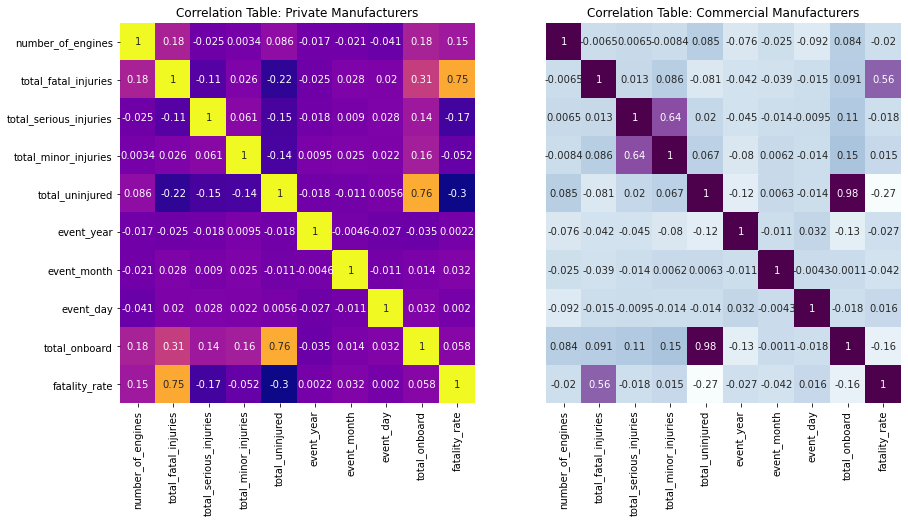

In [ ]:
fig,(ax1, ax2) = plt.subplots(ncols=2, figsize=(14,7))
sns.heatmap(df_private.corr(), cmap='plasma',
            ax=ax1, annot=True,
            cbar=False).set_title('Correlation Table: Private Manufacturers')
sns.heatmap(df_commercial.corr(), cmap='BuPu',
            ax=ax2, annot=True, cbar=False,
            yticklabels=False).set_title('Correlation Table: Commercial Manufacturers')

plt.show()


There is a strong positive correlation between total number of passengers on board and total uninjured:
- 0.76 coefficient for Private
- 0.98 coefficient for Commercial

Plotting general info about the passengers during 2003-2023

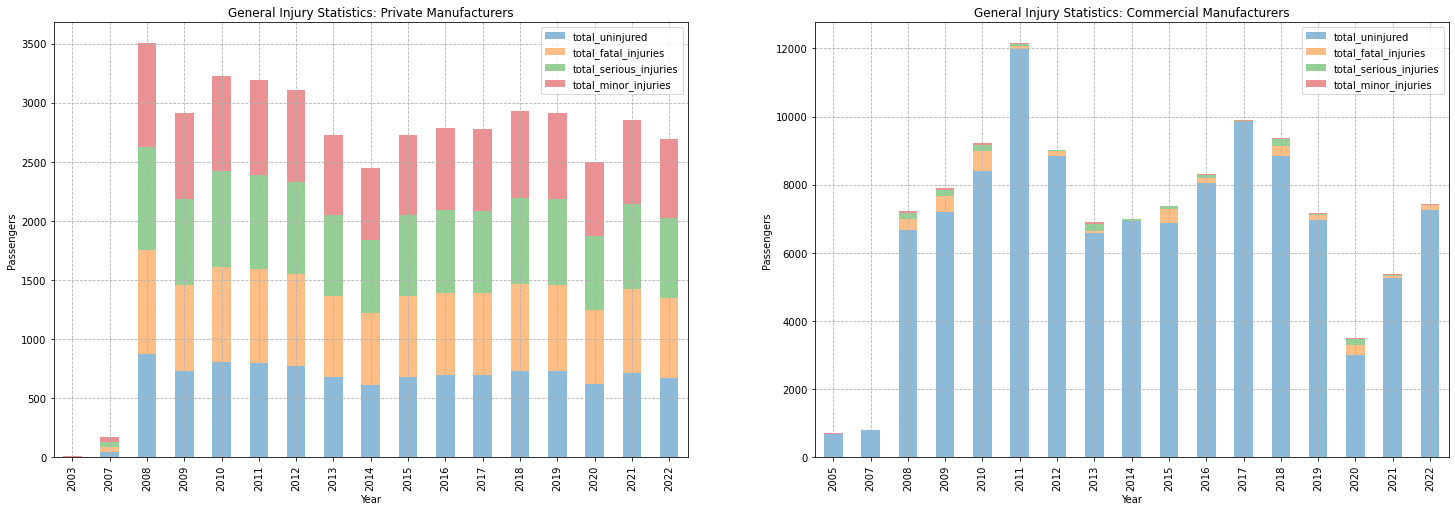

In [ ]:
fig,(ax1, ax2) = plt.subplots(ncols=2, figsize=(25,8))

df_private.groupby('event_year')[['total_uninjured', 'total_fatal_injuries', 'total_serious_injuries',
                                  'total_minor_injuries']].agg('count').plot(kind='bar',
                                    stacked=True, ax=ax1, alpha=0.5, title='General Injury Statistics: Private Manufacturers',
                                    xlabel="Year", ylabel="Passengers")

df_commercial.groupby('event_year')[['total_uninjured', 'total_fatal_injuries', 'total_serious_injuries',
                                     'total_minor_injuries']].agg('sum').plot(kind='bar',stacked=True,
                                      ax=ax2, alpha=0.5, linestyle='--', title='General Injury Statistics: Commercial Manufacturers',
                                      xlabel="Year", ylabel="Passengers")


ax1.grid(linestyle='--')
ax2.grid(linestyle='--');

Plotting average fatality rate for priate and commercial datasets

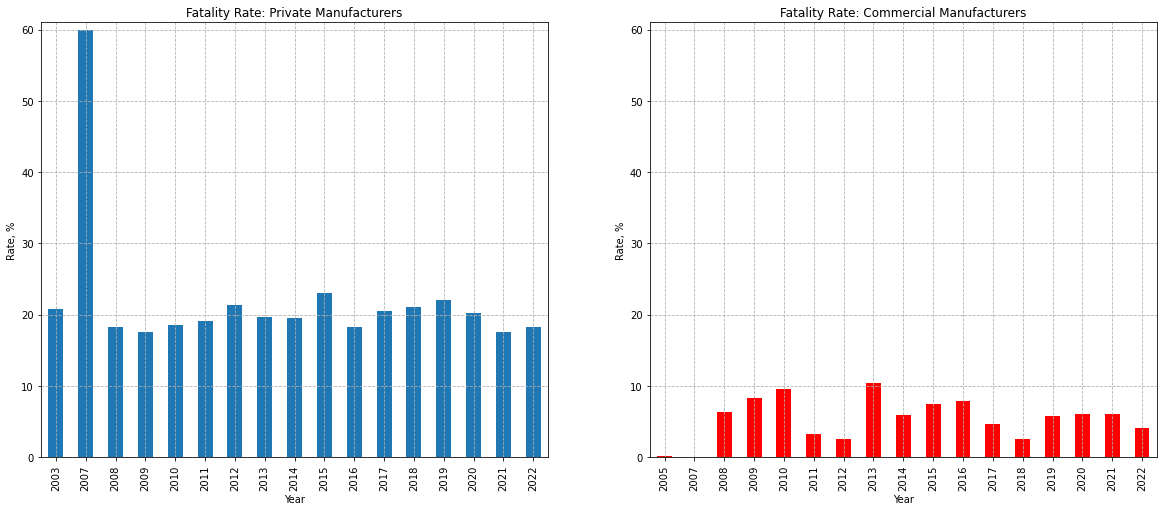

In [ ]:
fig,(ax1, ax2) = plt.subplots(ncols=2, figsize=(20,8))

df_private.groupby('event_year')['fatality_rate'].agg('mean').plot(kind='bar',
                                    ax=ax1, title='Fatality Rate: Private Manufacturers',
                                    xlabel="Year", ylabel="Rate, %")

df_commercial.groupby('event_year')['fatality_rate'].agg('mean').plot(kind='bar',
                                    ax=ax2, linestyle='--', color= 'r', title='Fatality Rate: Commercial Manufacturers',
                                    xlabel="Year", ylabel="Rate, %")

ax1.set_ylim([0, 61])
ax2.set_ylim([0, 61])
ax1.grid(linestyle='--')
ax2.grid(linestyle='--');

Fatality rate on private flights is in average 2-3 times higher than on commercial flights

In [ ]:
df_private.groupby('event_year')['fatality_rate'].agg('mean').round(2)

event_year
2003    20.83
2007    59.92
2008    18.21
2009    17.54
2010    18.53
2011    19.16
2012    21.40
2013    19.61
2014    19.61
2015    23.10
2016    18.29
2017    20.54
2018    21.02
2019    22.06
2020    20.25
2021    17.56
2022    18.21
Name: fatality_rate, dtype: float64

In [ ]:
df_commercial.groupby('event_year')['fatality_rate'].agg('mean').round(2)

event_year
2005     0.15
2007     0.00
2008     6.41
2009     8.33
2010     9.62
2011     3.23
2012     2.53
2013    10.49
2014     5.93
2015     7.41
2016     7.95
2017     4.65
2018     2.62
2019     5.80
2020     6.11
2021     6.06
2022     4.11
Name: fatality_rate, dtype: float64

Exploring fatality rate by make

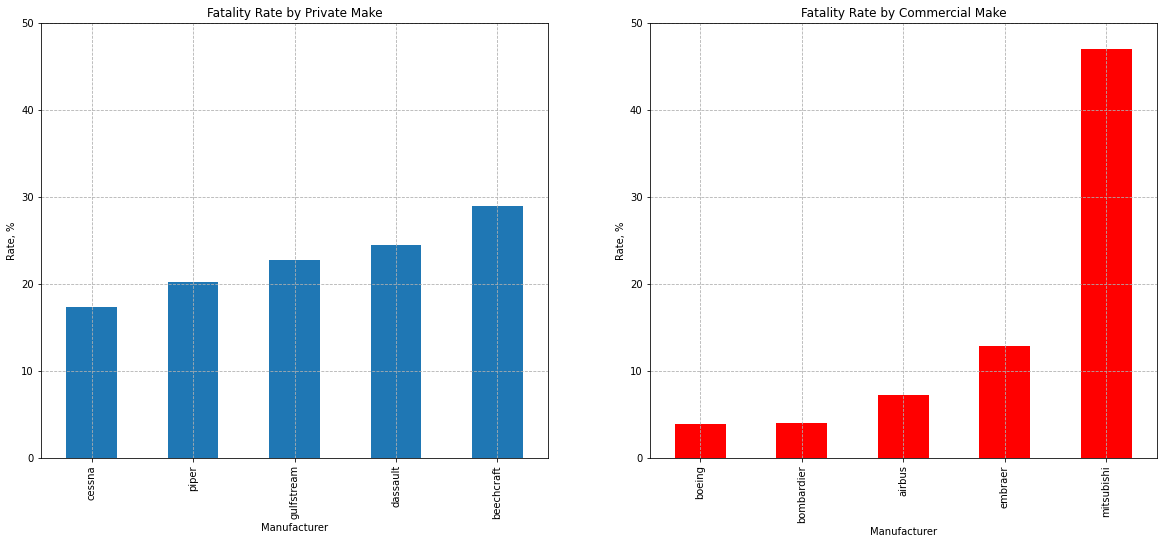

In [ ]:
fig,(ax1, ax2) = plt.subplots(ncols=2, figsize=(20,8))

df_private.groupby('make_top')['fatality_rate'].agg('mean').sort_values().plot(kind='bar',
                                    ax=ax1, title='Fatality Rate by Private Make',
                                    xlabel="Manufacturer", ylabel="Rate, %")

df_commercial.groupby('make_top')['fatality_rate'].agg('mean').sort_values().plot(kind='bar',
                                    ax=ax2, linestyle='--', color = 'r', title='Fatality Rate by Commercial Make',
                                    xlabel="Manufacturer", ylabel="Rate, %")

ax1.set_ylim([0, 50])
ax2.set_ylim([0, 50])
ax1.grid(linestyle='--')
ax2.grid(linestyle='--');

In [ ]:
df_private.groupby('make_top')['fatality_rate'].agg('mean').sort_values().round(2)

make_top
cessna        17.41
piper         20.28
gulfstream    22.75
dassault      24.51
beechcraft    29.03
Name: fatality_rate, dtype: float64

In [ ]:
df_commercial.groupby('make_top')['fatality_rate'].agg('mean').sort_values().round(2)

make_top
boeing         3.93
bombardier     4.08
airbus         7.21
embraer       12.85
mitsubishi    47.06
Name: fatality_rate, dtype: float64

Exploring fatality rate by engine type within private and commercial manufacturers

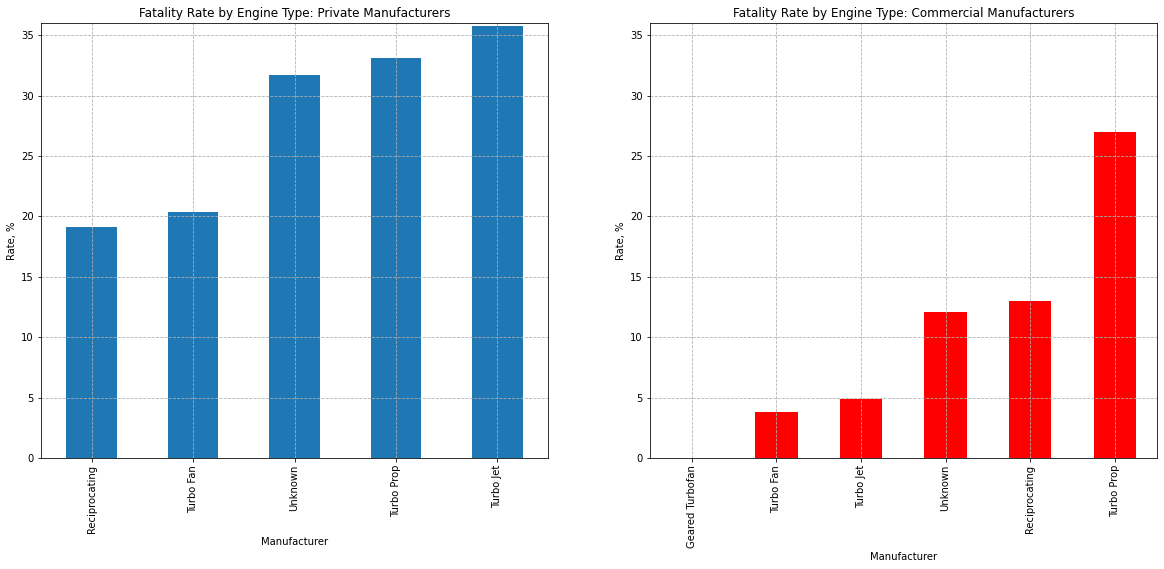

In [ ]:
fig,(ax1, ax2) = plt.subplots(ncols=2, figsize=(20,8))

df_private.groupby('engine_type')['fatality_rate'].agg('mean').sort_values().plot(kind='bar',
                                    ax=ax1, title='Fatality Rate by Engine Type: Private Manufacturers',
                                    xlabel="Manufacturer", ylabel="Rate, %")

df_commercial.groupby('engine_type')['fatality_rate'].agg('mean').sort_values().plot(kind='bar',
                                    ax=ax2, linestyle='--', color = 'r', title='Fatality Rate by Engine Type: Commercial Manufacturers',
                                    xlabel="Manufacturer", ylabel="Rate, %")

ax1.set_ylim([0, 36])
ax2.set_ylim([0, 36])
ax1.grid(linestyle='--')
ax2.grid(linestyle='--');

In [ ]:
df_commercial.groupby('engine_type')['fatality_rate'].agg('mean').sort_values().round(2)

engine_type
Geared Turbofan     0.00
Turbo Fan           3.82
Turbo Jet           4.88
Unknown            12.07
Reciprocating      12.98
Turbo Prop         26.95
Name: fatality_rate, dtype: float64

In [ ]:
df_private.groupby('engine_type')['fatality_rate'].agg('mean').sort_values().round(2)

engine_type
Reciprocating    19.08
Turbo Fan        20.34
Unknown          31.72
Turbo Prop       33.10
Turbo Jet        35.79
Name: fatality_rate, dtype: float64

Exploring aircraft damage type by manufacturer

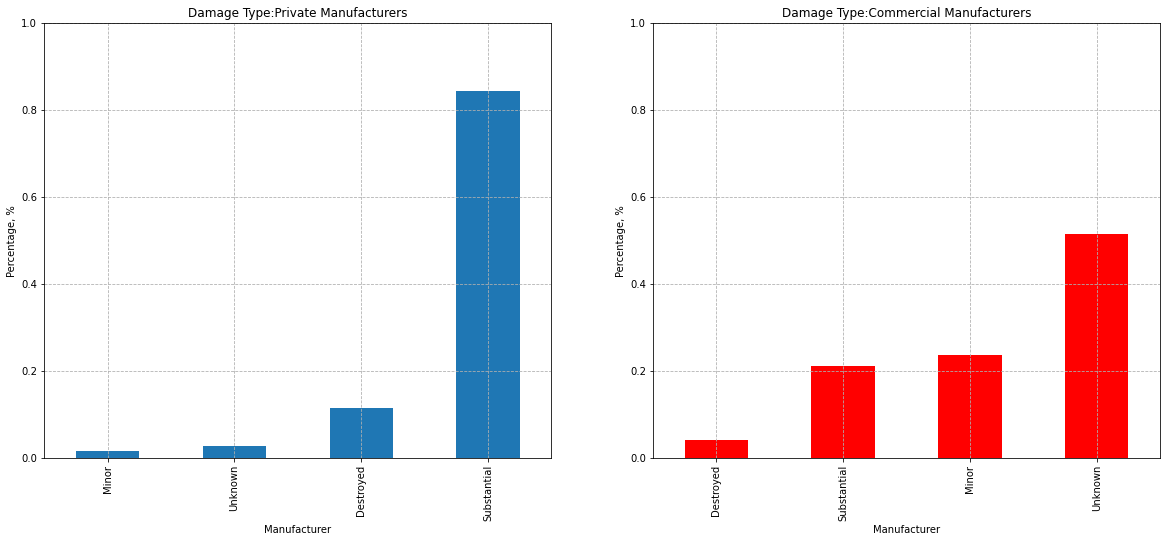

In [ ]:
fig,(ax1, ax2) = plt.subplots(ncols=2, figsize=(20,8))

df_private['aircraft_damage'].value_counts(normalize=True, ascending=True).plot(kind='bar',
                                    ax=ax1, title='Damage Type:Private Manufacturers',
                                    xlabel="Manufacturer", ylabel="Percentage, %")



df_commercial['aircraft_damage'].value_counts(normalize=True, ascending=True).plot(kind='bar',
                                    ax=ax2, color = 'r', title='Damage Type:Commercial Manufacturers',
                                    xlabel="Manufacturer", ylabel="Percentage, %")

ax1.set_ylim([0, 1])
ax2.set_ylim([0, 1])
ax1.grid(linestyle='--')
ax2.grid(linestyle='--');

In [ ]:
df_private['aircraft_damage'].value_counts(normalize=True).round(2)

Substantial    0.84
Destroyed      0.11
Unknown        0.03
Minor          0.02
Name: aircraft_damage, dtype: float64

In [ ]:
df_commercial['aircraft_damage'].value_counts(normalize=True).round(2)

Unknown        0.51
Minor          0.23
Substantial    0.21
Destroyed      0.04
Name: aircraft_damage, dtype: float64

Exploring aircraft damage type by make

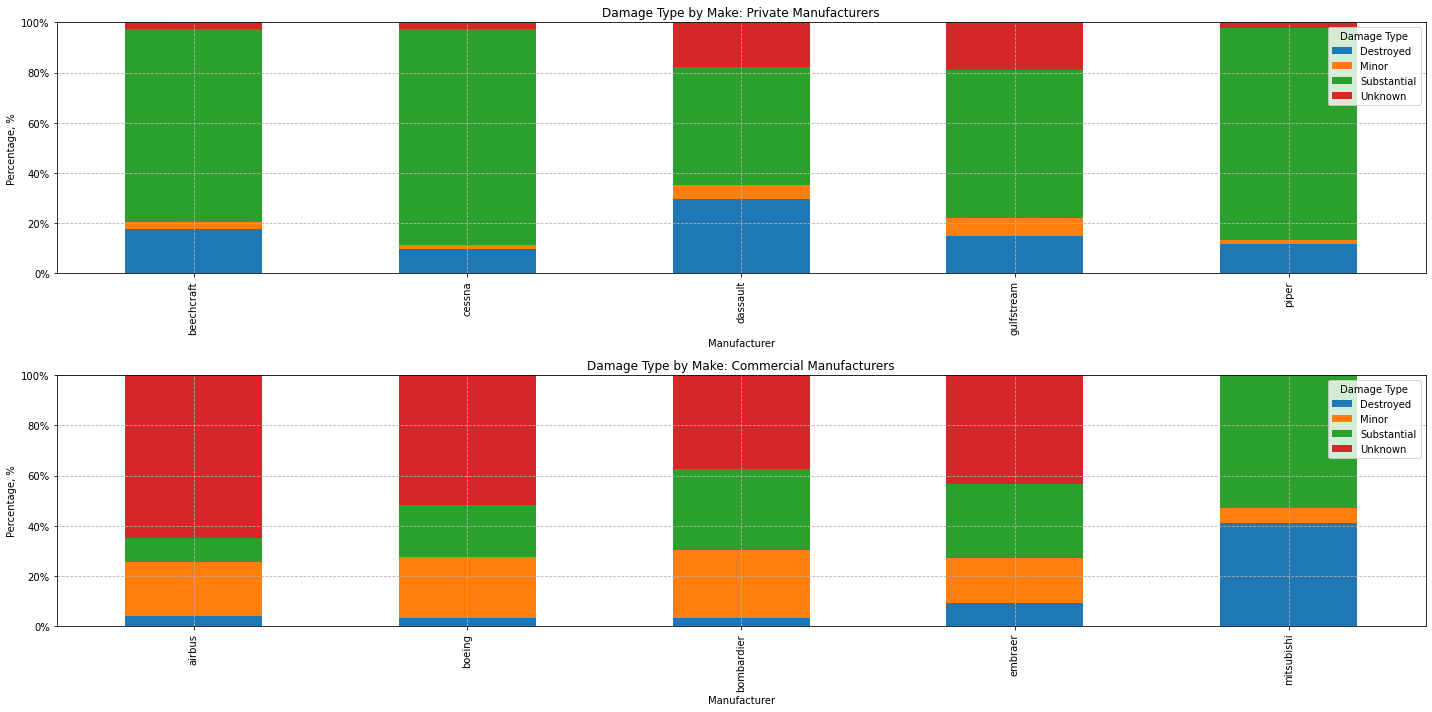

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(20, 10))

private_plot = df_private.groupby('make_top')['aircraft_damage'].value_counts(normalize=True).unstack()
private_plot.plot(kind='bar', ax=ax1, stacked=True)
ax1.set_title('Damage Type by Make: Private Manufacturers')
ax1.set_xlabel('Manufacturer')
ax1.set_ylabel('Percentage, %')
ax1.set_ylim([0, 1])
ax1.grid(linestyle='--')
ax1.legend(title='Damage Type', loc='upper right')
ax1.set_yticklabels(['{:,.0%}'.format(x) for x in ax1.get_yticks()])

commercial_plot = df_commercial.groupby('make_top')['aircraft_damage'].value_counts(normalize=True).unstack()
commercial_plot.plot(kind='bar', ax=ax2, stacked=True)
ax2.set_title('Damage Type by Make: Commercial Manufacturers')
ax2.set_xlabel('Manufacturer')
ax2.set_ylabel('Percentage, %')
ax2.set_ylim([0, 1])
ax2.grid(linestyle='--')
ax2.legend(title='Damage Type', loc='upper right')
ax2.set_yticklabels(['{:,.0%}'.format(x) for x in ax2.get_yticks()])

plt.tight_layout()
plt.show()

In [ ]:
df_private.groupby('make_top')['aircraft_damage'].value_counts(normalize=True,
                                                               ascending=False).round(2)

make_top    aircraft_damage
beechcraft  Substantial        0.77
            Destroyed          0.18
            Minor              0.03
            Unknown            0.03
cessna      Substantial        0.86
            Destroyed          0.10
            Unknown            0.03
            Minor              0.01
dassault    Substantial        0.47
            Destroyed          0.29
            Unknown            0.18
            Minor              0.06
gulfstream  Substantial        0.59
            Unknown            0.19
            Destroyed          0.15
            Minor              0.07
piper       Substantial        0.85
            Destroyed          0.12
            Unknown            0.02
            Minor              0.01
Name: aircraft_damage, dtype: float64

In [ ]:
df_commercial.groupby('make_top')['aircraft_damage'].value_counts(normalize=True,
                                                                  ascending=False).round(2)

make_top    aircraft_damage
airbus      Unknown            0.65
            Minor              0.21
            Substantial        0.09
            Destroyed          0.04
boeing      Unknown            0.52
            Minor              0.25
            Substantial        0.21
            Destroyed          0.03
bombardier  Unknown            0.37
            Substantial        0.33
            Minor              0.27
            Destroyed          0.03
embraer     Unknown            0.44
            Substantial        0.29
            Minor              0.18
            Destroyed          0.09
mitsubishi  Substantial        0.53
            Destroyed          0.41
            Minor              0.06
Name: aircraft_damage, dtype: float64

In [ ]:
df_clean.to_csv('data_tableau.csv', index=False)

## Summary

**1. Data in original dataset was explored and preprocessed**
- Non-informative columns were dropped
- Names of the columns were converted to snake style
- Column 'event_date' was converted to datetime data
- Columns 'event_year', 'event_month', 'event_day' were created
- Columns 'weather_condition', 'aircraft_damage', 'broad_phase_of_flight'  
missing values were filled with 'unknown' value
- Missing values of 'make' and 'model' were dropped.  
All the values were converted to lower in order to avoid duplicates
- Columns 'aircraft_category', 'engine_type' missing values were filled with mode value in 'model'
- Column 'number_of_engines' missing values were filled with mean value in 'model'.  
- Columns 'total_fatal_injuries', 'total_serious_injuries', 'total_minor_injuries',  
 'total_uninjured', 'number_of_engines' were converted to integer data type
- Duplicated rows were dropped

**2. Exploratory data analysis for recommendations was conducted**

**2.1. General Data Analysis**

Cleaned dataset was futher processed to comply with client's inquire
- Professionally built aircraft:  
a successful production run = 15-20 years  
aircraft lifetime = 25-35 years
- Airplane was chosen as a type of aircraft
- Top 10 commercial and private manufacturers based on revenue were explored ([Source](https://assetsamerica.com/aircraft-manufacturers/)).  
Commercial manufactures that have private production are counted as commercial only.  
Piper is added in private manufacturers top list
- Engine type "turbo shaft" was deleted because it is used for helicopters only
- Additional column 'total onboard' was added to calculate fatality rate
- Fatality rate is considered as a main value defining "the lowest risk" criteria

Among top 10 commercial manufacturers only 5 were presented in actual dataset.  
The rest 5 are international companies:
- Comac: China. No commercial flights outside China yet.
- UAC, Aviastar_SP, KAPA: Russia. No international commercial flights.
- GippsAero: Australia. In 2021 converted into a Spares and Support Organization.

The data was splitted into private and commercial datasets.

Typical aircraft event looks like below:
1. Private Manufacturer:
- Time and conditions: an accident with a substantial damage that took place  
under visual meteorological conditions in the middle of summer between Wednesday and Thursday
- Aircraft: Cessna 172 with one reciprocating (piston) engine
- Passengers: 2 persons on board with a high probability of 1 person being a fatal injury

2. Commercial Manufacturer:
- Time and conditions: an incident with unknown type of damage ( inclining to minor) that took place  
under uknown meteorological conditions in the middle of summer between Tuesday and Wednesday
- Aircraft: Boeing 737 with 2 turbo fan engines
- Passengers: 68 passengers on board with 65 uninjured, 2 dead and 1 with serious or minor injury

**2.2. Data Analysis for Recommendations**

There is a strong positive correlation between total on board and uninjured passengers:
- 0.76 coefficient for Private
- 0.98 coefficient for Commercial

Fatality rate was explored as below:  

__Average fatality rate by make, %:__  

Private:
- Cessna:        17.41
- Piper:         20.28
- Gulfstream:    22.75
- Dassault:      24.51
- Beechcraft:    29.03

Commercial:
- Boeing:         3.93
- Bombardier:     4.08
- Airbus:         7.21
- Embraer:       12.85
- Mitsubishi:    47.06

__Average fatality rate, by engine type, %:__  

Private:
- Reciprocating:    19.08
- Turbo Fan:        20.34
- Unknown:          31.72
- Turbo Prop:       33.10
- Turbo Jet:        35.79  

Commercial:
- Turbo Fan:           3.82
- Turbo Jet:           4.88
- Unknown:            12.07
- Reciprocating:      12.98
- Turbo Prop:         26.95

__Aircraft damage by make, %:__  

Private:

_beechcraft_
- Substantial:        0.77
- Destroyed:          0.18  
_cessna_      
- Substantial:        0.86
- Destroyed:          0.10  
_dassault_    
- Substantial:        0.47
- Destroyed:          0.29  
_gulfstream_  
- Substantial:        0.59
- Unknown:            0.19  
_piper_       
- Substantial:        0.85
- Destroyed:          0.12

Commercial:  
_airbus_      
- Unknown            0.65
- Minor              0.21  
_boeing_     
- Unknown            0.52
- Minor              0.25  
_bombardier_  
- Unknown            0.37
- Substantial        0.33  
_embraer_     
- Unknown            0.44
- Substantial        0.29  
_mitsubishi_  
- Substantial        0.53
- Destroyed          0.41

Private makes are mostly destroyed or obtaining substantial damage.  
Commercial makes obtaining unknown or substantial/minor damage.  

**Recommendations**

_Commercial make:_

1. Boeing and Bombardier are the best options with 3.9% and 4.1% average fatality rate per event.
2. When choosing a model client should pay attention to the type of engine.  
Turbo Fan and Turbo Jet have the lowest fatality rate per event with 3.8% and 4.9% correspondingly.
3. Size matters.The bigger airplane, the safer.  
Very strong positive correlation of 0.98 between total on board and uninjured passengers

_Private make:_
1. Cessna and Piper are the best options with 17% and 20 % average fatality rate per event.
2. When choosing a model client should pay attention to the type of engine.   
Reciprocating and Turbo Fan have the lowest fatality rate per event with 19% and 20% correspondingly.
3. Size matters.The bigger airplane, the safer.  
Strong positive correlation of 0.76 between total on board and uninjured passengers

Remarks: Despite 2 private makes being involved in 87% of all the events: Cessna 55% and Piper 32%, we still consider them as top option.  
The lowest aircraft damage type "destroyed" between all the private makes is considered to be a strong indirect evidence:
Cessna 10% and Piper 12%.  
Numbers of events could indicate a big popularity of these 2 makes among clients.

**Future Insights**
- Weigh financial options between top 2 commercial and private manufacturers
- Gather further flight information to expand analysis
- Pay attention to emerging market of electric airplanes
